## Importing data from pickle

---



In [ ]:
!pip install geotext
!pip install keybert
from collections import Counter
from keybert import KeyBERT
import pandas as pd
from tqdm import tqdm
import os
import torch
print(torch.cuda.is_available())

True


In [ ]:
# Replace 'your_file_path.pkl' with the actual path to your pickle file
file_path = '/content/drive/MyDrive/Pol Project/NSS/Extracted/NSS_df_NER.pkl'
# Read the pickle file into a DataFrame
df = pd.read_pickle(file_path)
df = df[['Year','Text']]
df.head()

Year                                               Text
0  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...
1  1988   \n\n \n   \n    \n    \n\nNATIONAL\nSECURIT\n...
2  1990  United Slates. Freside nr\n\n(14-6 Muck\n\nNAT...
3  1991  NATIONAL\nSECURITY\n\nny WE RORY\n\nOF THE\nUN...
4  1993  NATIONAL\nACh\nSTRATEGY\n\nOF THE\nUNITED STAT...

## Creating Chunks

---



In [ ]:
# Define a function to estimate the token size
def estimate_token_size(text):
    return len(text.split()) * 1.33

# Define a class to handle the text splitting with overlapping
class RecursiveCharacterTextSplitter:
    def __init__(self, chunk_size, chunk_overlap, length_function):
        self.chunk_size = chunk_size
        self.chunk_overlap = chunk_overlap
        self.length_function = length_function

    def create_documents(self, text):
        words = text[0].split()
        chunks = []
        index = 0
        while index < len(words):
            # Calculate the end index of the current chunk
            end_index = index + self.chunk_size
            # If not at the end, extend to include overlap
            if end_index < len(words):
                end_index += self.chunk_overlap
            # Join words to form the current chunk
            chunk = ' '.join(words[index:end_index])
            chunks.append(chunk)
            # Move the start index forward by chunk_size
            index += self.chunk_size
        return chunks

# Rewrite of the split_text_to_chunks function to use RecursiveCharacterTextSplitter
def split_text_to_chunks(text, chunk_size):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=30,  # assuming an overlap of 100 words
        length_function=estimate_token_size
    )
    return text_splitter.create_documents([text])

In [ ]:
def extract_keywords(text, kw_model):
    # Split the text into chunks of 300 words
    chunk_size = 300
    words = text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]

    # Extract keywords for each chunk
    keywords = []
    for chunk in chunks:
        chunk_keywords = kw_model.extract_keywords(
            chunk,
            keyphrase_ngram_range=(3, 3),
            stop_words='english',
            nr_candidates=20,
            use_maxsum=True,
            top_n=3
        )
        keywords.extend([keyword for keyword, _ in chunk_keywords])

    return ', '.join(keywords)

# Create an instance of the KeyBERT model
kw_model = KeyBERT()

In [ ]:
tqdm.pandas(desc="Extracting keywords")

df['Summary_Topics'] = df['Text'].progress_apply(lambda x: extract_keywords(x, kw_model))

df.head(n=10)

Extracting keywords: 100%|██████████| 18/18 [02:16<00:00,  7.58s/it]


Year                                               Text  \
0  1987  NATIONAL\nSECURITY\nSTRATEGY\n\nOF THE\nUNITED...   
1  1988   \n\n \n   \n    \n    \n\nNATIONAL\nSECURIT\n...   
2  1990  United Slates. Freside nr\n\n(14-6 Muck\n\nNAT...   
3  1991  NATIONAL\nSECURITY\n\nny WE RORY\n\nOF THE\nUN...   
4  1993  NATIONAL\nACh\nSTRATEGY\n\nOF THE\nUNITED STAT...   
5  1994  a SANBAOL®\nba vay\n\nind te pasar inte”\n\nA ...   
6  1995  A NATIONAL\nSECURITY\nSTRATEGY\n\ne)5\nENGAGEM...   
7  1996   \n\n \n\n \n\nA NATIONAL\nSECURITY\nSTRATEGY\...   
8  1997  A National Security Strategy\nfor A New Centur...   
9  1998  A NATIONAL\nSECURITY\nSTRATEGY\nFORA\n\nNEW CE...   

                                      Summary_Topics  
0  strategy security complex, international econo...  
1  13 policy deterrence, 1988 national security, ...  
2  challenges responses soviet, strategic arms re...  
3  1990s 13 alliances, ballistic missile defense,...  
4  defense international pages, security challeng...  
5  maintaining strong defense, 11 strategic nucle...  
6  nuclear forces 15, strategy engagement nd, pro...  
7  missiles 19 nonproliferation, 11 enhancing sec...  
8  strategy new century, providing energy securit...  
9  crises 14 transnational, warfare 22 preparing,...

## Visualisation

---



In [ ]:
#To make a list of top 100 words
from collections import Counter

# Create a list of all words in 'summary_topics'
all_words = []
for topics in df['Summary_Topics']:
    words = topics.split(',')
    all_words.extend(words)

# Create a list of the top 100 most occurring words
word_counts = Counter(all_words)
top_100_words = [word for word, _ in word_counts.most_common(100)]
top_100_words

[' national security strategy',
 ' weapons mass destruction',
 ' forces united states',
 ' security strategy kakkkkk',
 ' arms control agreements',
 ' tariffs trade gatt',
 ' ensure united states',
 ' uruguay round negotiations',
 ' democracy human rights',
 ' democratic nations hemisphere',
 ' test ban treaty',
 ' presidential decision directive',
 ' costs risks military',
 ' convention conventional weapons',
 ' strengthening macroeconomic coordination',
 ' hemisphere cuba democratic',
 ' threat united states',
 ' providing energy security',
 ' drug control strategy',
 ' protecting national security',
 ' foreign assistance focuses',
 ' weapons united states',
 ' east west relations',
 ' united states maintain',
 ' soviets escape retaliation',
 ' strategic force structure',
 ' strategic nuclear forces',
 ' forward deployed forces',
 ' national interests objectives',
 ' coordinating committee multilateral',
 ' costs maintaining military',
 ' atlantic alliance remains',
 ' minimum essent

In [ ]:
words_to_remove = ['united states', 'united states of america', 'national security strategy', 'national', 'security', 'strategy', 'america', 'american']

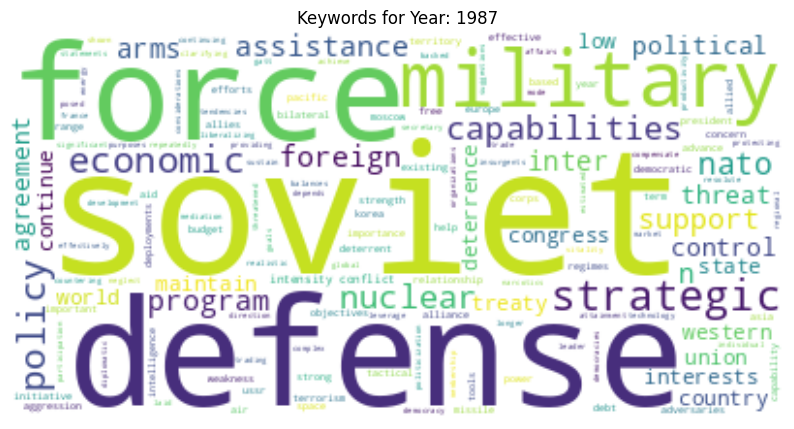

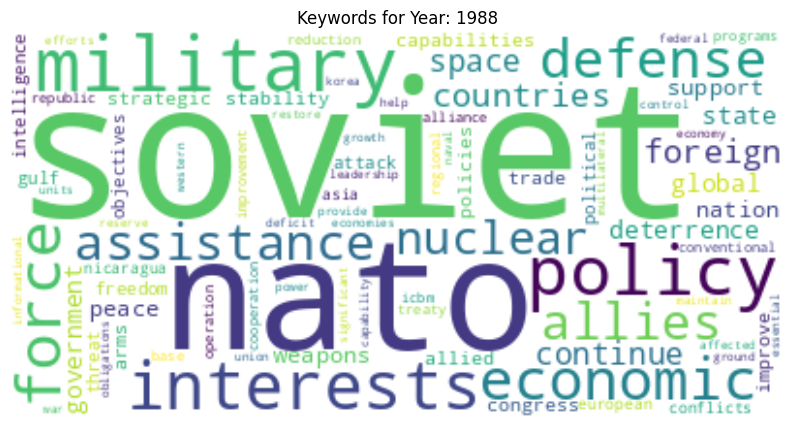

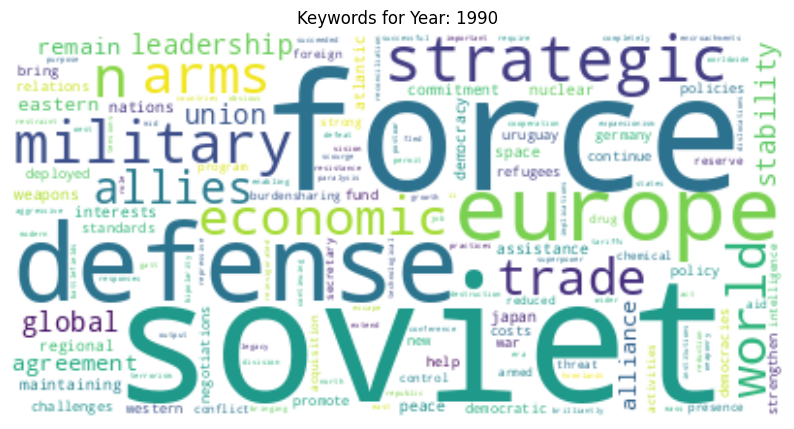

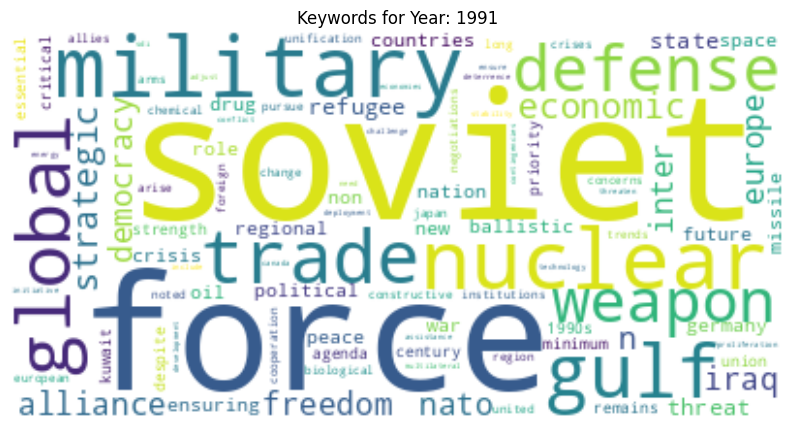

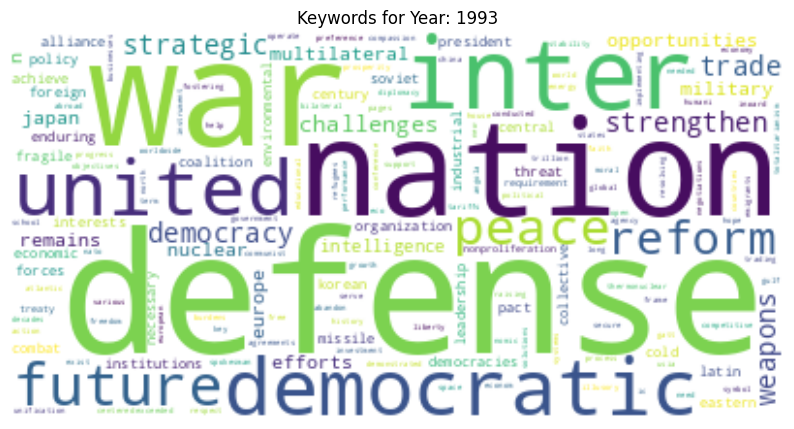

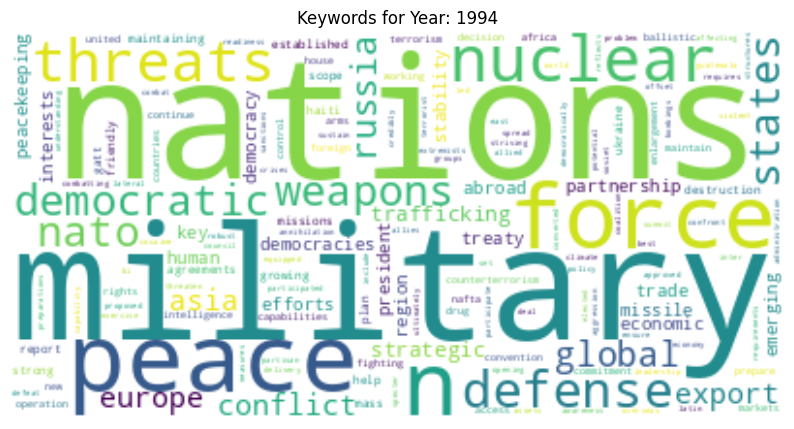

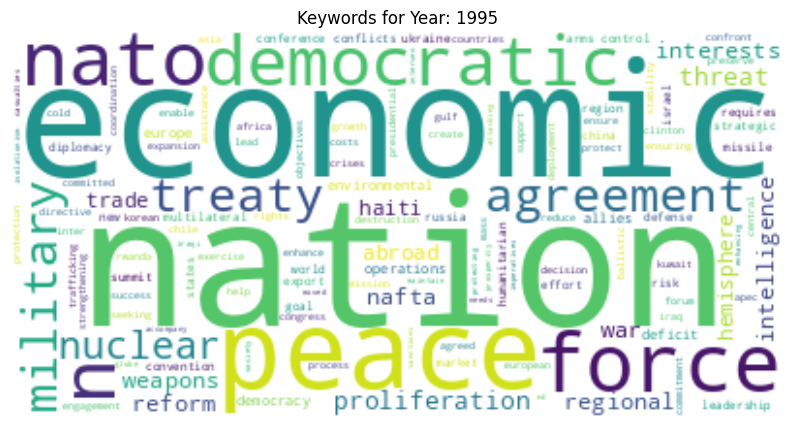

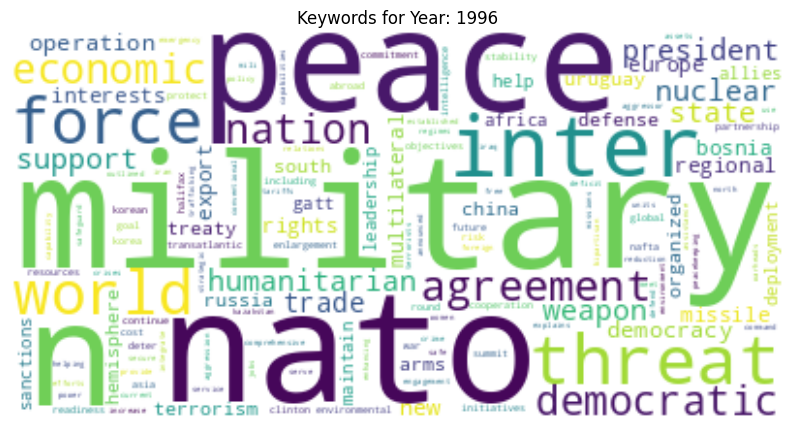

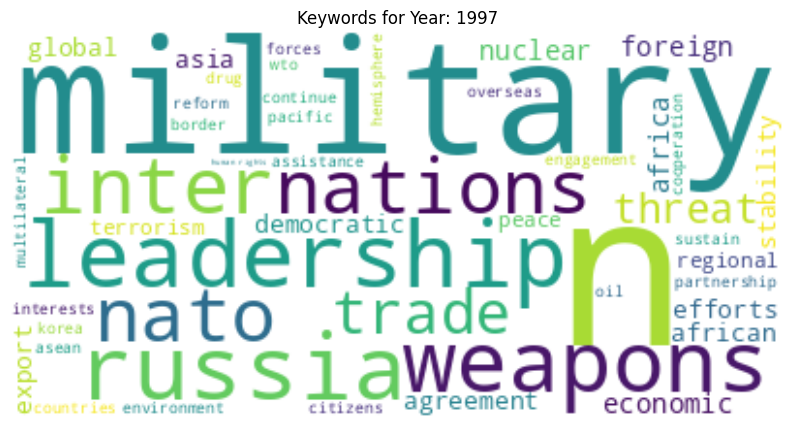

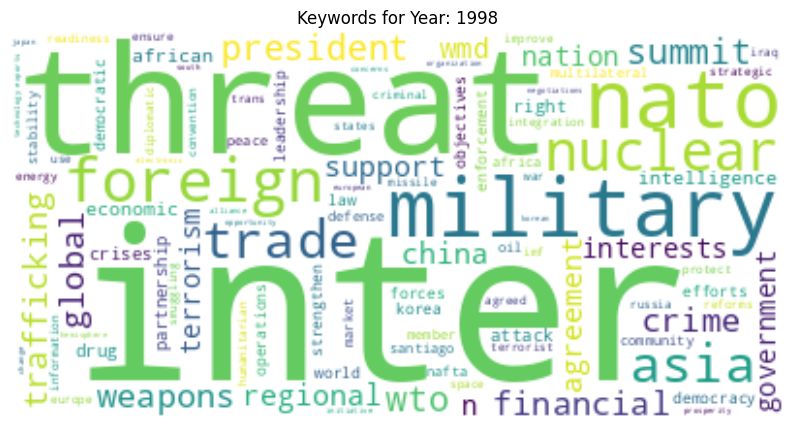

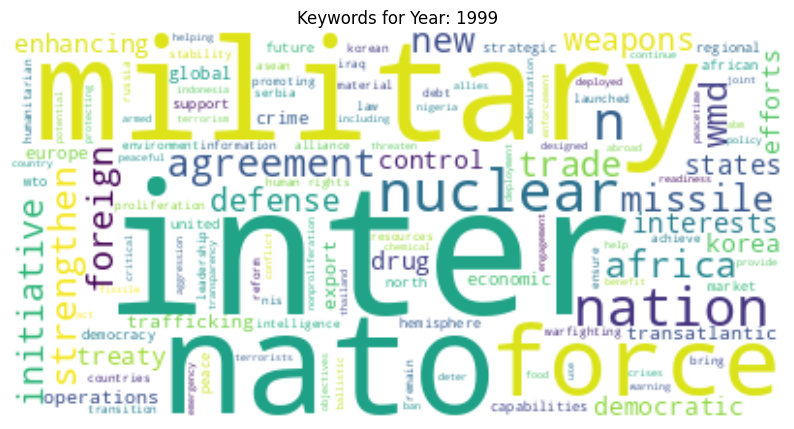

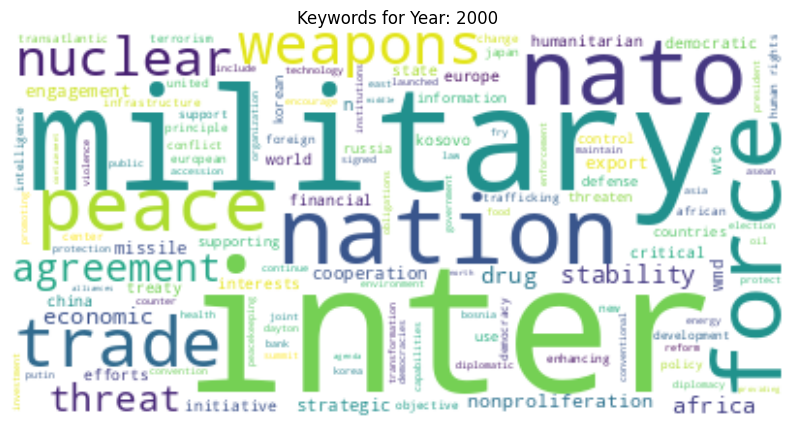

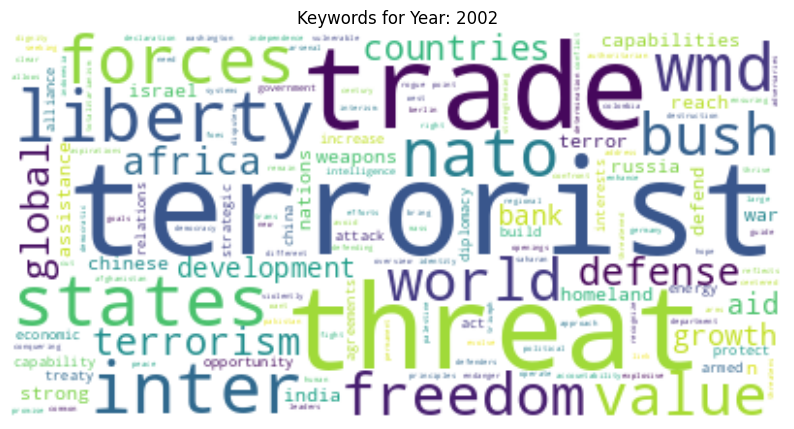

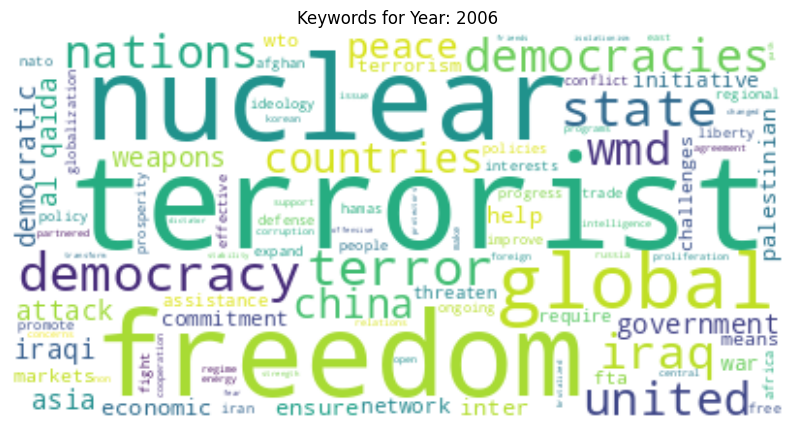

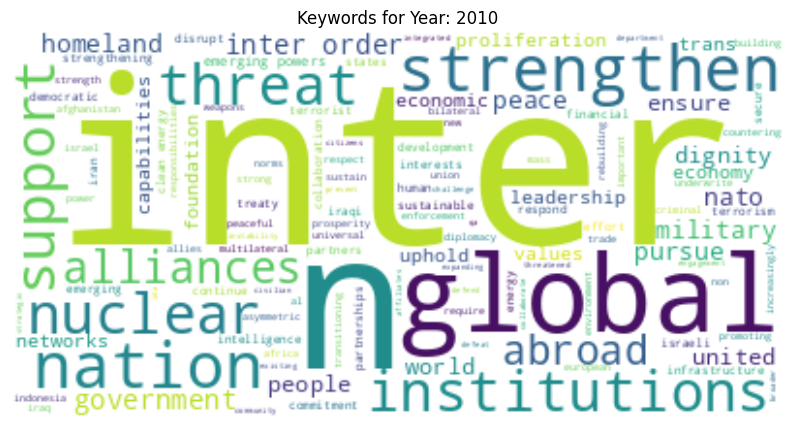

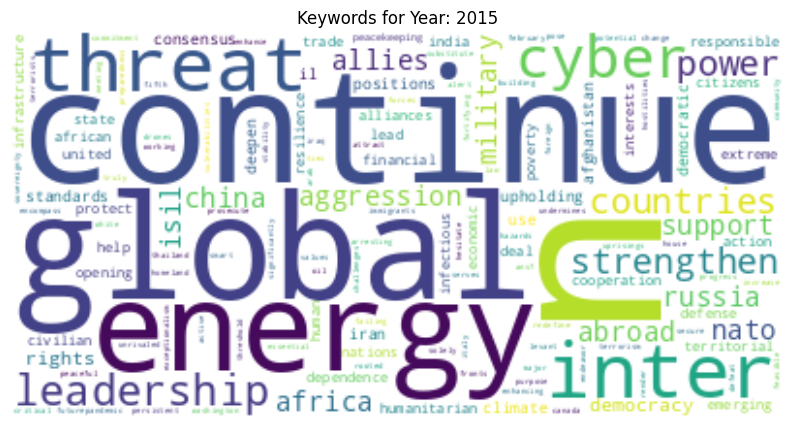

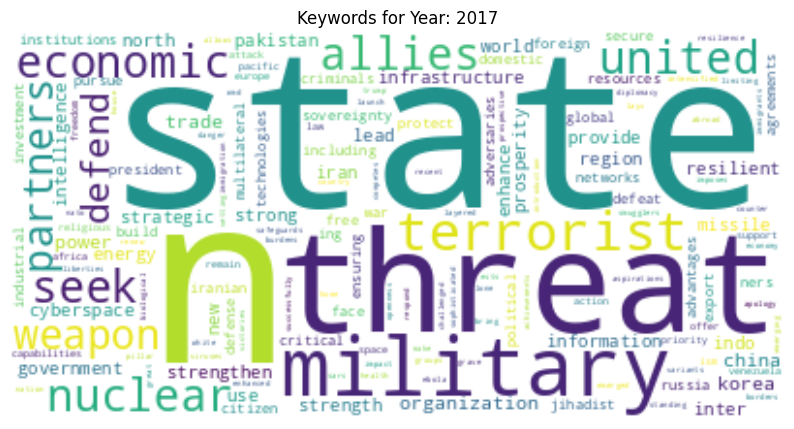

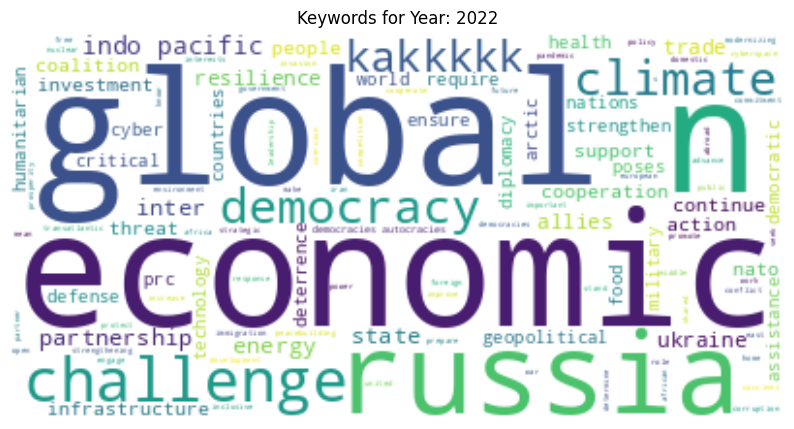

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def visualize_keywords_per_year(df, words_to_remove):
    for year, group_df in df.groupby('Year'):
        all_keywords = " ".join(group_df['Summary_Topics'])

        # Remove the specified words from the keywords
        for word in words_to_remove:
            all_keywords = all_keywords.replace(word, "")

        if all_keywords:  # Check if we have any keywords
            wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS).generate(all_keywords)
            plt.figure(figsize=(10, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title(f"Keywords for Year: {year}")
            plt.show()
        else:
            print(f"No keywords found for year: {year}")

visualize_keywords_per_year(df, words_to_remove)

In [17]:
df = df[['Year','Summary_Topics']]
df.to_csv('NSS_Summary_Topics.csv', index=False)